# Part 3: Model Selection

## Import Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 


Bad key "text.kerning_factor" on line 4 in
C:\Users\sumai\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


## Load Dataset

Please see the link to know more about the dataset: https://archive.ics.uci.edu/ml/datasets/Cervical+cancer+%28Risk+Factors%29

In [2]:
features = ['age', 'number_of_sexual_partners', 'first_sexual_intercourse',
       'num_of_pregnancies', 'smokes_(years)', 'smokes_(packs_year)',
       'hormonal_contraceptives', 'hormonal_contraceptives_(years)',
       'iud', 'iud_(years)', 'stds_(number)',
       'stds_vulvo-perineal_condylomatosis', 'stds_number_of_diagnosis',
       'dx_cancer', 'dx_hpv', 'hinselmann']


df = pd.read_csv('preprocessed_risk_factors_cervical_cancer.csv', usecols = features)
df.head()

,age,number_of_sexual_partners,first_sexual_intercourse,num_of_pregnancies,smokes_(years),smokes_(packs_year),hormonal_contraceptives,hormonal_contraceptives_(years),iud,iud_(years),stds_(number),stds_vulvo-perineal_condylomatosis,stds_number_of_diagnosis,dx_cancer,dx_hpv,hinselmann
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
2,34,1.0,19.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
3,52,5.0,16.0,4.0,37.0,37.0,1.0,3.0,0.0,0.0,0.0,0.0,0,1,1,0
4,46,3.0,21.0,4.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0,0,0,0


## Split Input and Traget Variables

In [3]:
X = df.drop('hinselmann', axis = 1) 
y = df['hinselmann']

In [4]:
X.columns

Index(['age', 'number_of_sexual_partners', 'first_sexual_intercourse',
       'num_of_pregnancies', 'smokes_(years)', 'smokes_(packs_year)',
       'hormonal_contraceptives', 'hormonal_contraceptives_(years)', 'iud',
       'iud_(years)', 'stds_(number)', 'stds_vulvo-perineal_condylomatosis',
       'stds_number_of_diagnosis', 'dx_cancer', 'dx_hpv'],
      dtype='object')

## Train Test Split

In [5]:
# train_test_split is used to split the dataset into test set and train set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.34, random_state =0)

print("Original shape of dataset: {}".format(df.shape))         # shape of original dataset
print("Shape of training dataset: {}".format(X_train.shape))      # shape of training dataset after split
print("Shape of testing dataset: {}".format(X_test.shape))        # shape of testing dataset after split

Original shape of dataset: (858, 16)
Shape of training dataset: (566, 15)
Shape of testing dataset: (292, 15)


In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Define Functions

#### Writing a function that returns the evaluation metrics as a DataFrame

In [7]:
def model_comparison(models =[], model_names= []): 
    
    acc = []
    prec = []
    recal = []
    f1_train = []
    f1_test = []
    roc_auc = []
    pr_auc = []
    
    for model in range(len(models)):
        clf = models[model]
        clf.fit(X_train, y_train)
        y_hat = clf.predict(X_test)
        y_hat_train = clf.predict(X_train) 
        pred_prob = clf.predict_proba(X_test)
        precision, recall, _ = precision_recall_curve(y_test, pred_prob[:, 1], pos_label=1)

        
        f1_train.append(f1_score(y_hat_train, y_train))
        f1_test.append(f1_score(y_hat, y_test))
        acc.append(accuracy_score(y_hat, y_test))
        prec.append(precision_score(y_hat, y_test))
        recal.append(recall_score(y_hat, y_test))
        roc_auc.append(roc_auc_score(y_test, y_hat))
        pr_auc.append(auc(recall, precision))
        
    compare = pd.DataFrame({'Algorithm' : model_names , 'ROC_AUC': roc_auc, 'PR_AUC': pr_auc, 'Precision': prec, 'Recall': recal, 'F1_Train': f1_train, 'F1_Test': f1_test, 'Accuracy' : acc, })
    return compare

#### Writing a function returns Macro and Weighted average of Recall Score

In [8]:

def macro_weighted(y_test, y_hat):
    
    rec = metrics.recall_score(y_test, y_hat)
    print ("Recall Score:", rec)

    rec_mac = metrics.recall_score(y_test, y_hat, average = 'macro')
    print ("Macro Average of Recall Score:", rec_mac)

    rec_wei = metrics.recall_score(y_test, y_hat, average = 'weighted')
    print ("Weighted Average of Recall Score:", rec_wei)

#### Detailed Macro & Weighted average values of the performance metrics

In [9]:
def macro_weighted_prec_rec(y_test, y_hat):
    
    rec = metrics.recall_score(y_test, y_hat)
    print ("Recall Score:", rec)
    
    rec_mac = metrics.recall_score(y_test, y_hat, average = 'macro')
    print ("Macro Average of Recall Score:", rec_mac)

    rec_wei = metrics.recall_score(y_test, y_hat, average = 'weighted')
    print ("Weighted Average of Recall Score:", rec_wei)
    
    print ('.')
    
    prec_mac = metrics.precision_score(y_test, y_hat, average = 'macro')
    print ("Macro Average of Precision Score:", prec_mac)

    prec_wei = metrics.precision_score(y_test, y_hat, average = 'weighted')
    print ("Weighted Average of Precision Score:", prec_wei)

    f1_mac = metrics.f1_score(y_test, y_hat, average = 'macro')
    print ("Macro Average of F1 Score:", f1_mac)

    f1_wei = metrics.f1_score(y_test, y_hat, average = 'weighted')
    print ("Weighted Average of F1 Score:", f1_wei)
    
    print ('.')
    
    acc = metrics.accuracy_score(y_test, y_hat)
    print ("Accuracy:", acc)

#### Performance of the Tarining & Test Set

In [10]:
def f1_acc(y_test, y_hat, y_train, y_hat_train): 
    
    acc_train = metrics.accuracy_score(y_train, y_hat_train)
    print ("Accuracy Score of Train Set:", acc_train)
    
    acc_test = metrics.accuracy_score(y_test, y_hat)
    print ("Accuracy Score of Test Set:", acc_test)
    
    print ('.')
    
    f1_train = metrics.f1_score(y_train, y_hat_train, average = 'macro')
    print ("F1 Score of Train Set:", f1_train)
    
    f1_test = metrics.f1_score(y_test, y_hat, average = 'macro')
    print ("F1 Score of Test Set:", f1_test)
    
    ax1 = sns.distplot(y_train, hist=False, color='pink', kde_kws={'bw':0.1}, label = 'Train Data')
    sns.distplot(y_hat_train, hist=False, ax=ax1, color='lightblue', kde_kws={'bw':0.1}, label = 'Predicted Data')
    
    plt.title('Actual vs Predicted Values for Diagnosis (Training Set)')
    plt.xlabel('Diagnosis')
    plt.ylabel('Proportion of Results')
    plt.legend()
    plt.show()
    
    ax2 = sns.distplot(y_test, hist=False, color='salmon', kde_kws={'bw':0.1}, label = 'Test Data')
    sns.distplot(y_hat, hist=False, ax=ax2, color='lightblue', kde_kws={'bw':0.1}, label = 'Predicted Result')
    plt.title('Actual vs Predicted Values for Diagnosis (Test Set)')
    plt.xlabel('Diagnosis')
    plt.ylabel('Proportion of Results')
    plt.legend()
    plt.show()

#### Let's look at the ROC_AUC, Precision Recall AUC and the Confusion Matrices of the top 5 models

In [11]:
def roc_pr_cm(models=[]):
    
    roc_auc = []
    pr_auc = []

    for model in range(len(models)):
        clf = models[model]
        clf.fit(X_train, y_train)
        y_hat = clf.predict(X_test)
        y_hat_train = clf.predict(X_train) 
    
        # predict probabilities
        pred_prob = clf.predict_proba(X_test)
    
        # Print the confusion matrix
        print('---------------------------------------------------------------')
        
        data = confusion_matrix(y_test, y_hat)
        df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
        df_cm.index.name = 'Actual'
        df_cm.columns.name = 'Predicted'
        plt.figure(figsize = (6, 4))
        #sns.set(font_scale=1.4) #for label size
        sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 12})# font size
        plt.show()
        
        tn, fp, fn, tp = confusion_matrix(y_test, y_hat).ravel()
        print ("TP: {}, FP: {}, TN: {}, FN: {}".format(tp, fp, tn, fn))

        # Print the precision and recall, among other metrics
        print('---------------------------------------------------------------')
        print(metrics.classification_report(y_test, y_hat, digits=3))
        
        print('---------------------------------------------------------------')
        
        macro_weighted(y_test, y_hat)
        
        print('---------------------------------------------------------------')
     
        fpr, tpr, thresh = roc_curve(y_test, pred_prob[:, 1], pos_label=1)
        roc_auc.append(roc_auc_score(y_test, y_hat))
    
        plt.style.use('seaborn')
        plt.figure(figsize=(8, 4))
        # plot roc curves
        plt.plot(fpr, tpr, label = models[model])
    
        plt.title('ROC curve where AUC= {}'.format(roc_auc[model]))
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive rate')

        plt.legend(loc='best')
        plt.savefig('ROC', dpi=300)
        plt.show();
    
        # calculate model precision-recall curve
        # precision, recall, _ = precision_recall_curve(y_hat , y_test)
        precision, recall, _ = precision_recall_curve(y_test, pred_prob[:, 1], pos_label=1)
        pr_auc.append(auc(recall, precision))
    
        # plot the model precision-recall curve
        plt.style.use('seaborn')
        plt.figure(figsize=(8, 4))
        plt.plot(recall, precision, marker='.', label = models[model])
        plt.title('Precision Recall curve AUC= {}'.format(pr_auc[model]))
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.legend(loc='best')
        plt.show()

### Model Selection (a) LazyClassifier

In [12]:
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose = 0, ignore_warnings = True, custom_metric = None)
model, predictions = clf.fit(X_train, X_test, y_train, y_test)
model

100%|██████████| 30/30 [00:00<00:00, 33.42it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
QuadraticDiscriminantAnalysis,0.21,0.59,0.59,0.31,0.01
GaussianNB,0.16,0.57,0.57,0.24,0.01
AdaBoostClassifier,0.96,0.56,0.56,0.96,0.08
XGBClassifier,0.98,0.50,0.50,0.96,0.05
CalibratedClassifierCV,0.98,0.50,0.50,0.96,0.09
CheckingClassifier,0.98,0.50,0.50,0.96,0.01
SVC,0.98,0.50,0.50,0.96,0.01
RidgeClassifierCV,0.98,0.50,0.50,0.96,0.01
RidgeClassifier,0.98,0.50,0.50,0.96,0.01


### Model Selection (b) Trying out Several Models

In [13]:
# Modelling Algorithms
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier 
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis , QuadraticDiscriminantAnalysis
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.tree import ExtraTreeClassifier
from lightgbm.sklearn import LGBMClassifier
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.metrics import f1_score,accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score, precision_recall_curve, auc
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score, confusion_matrix

#### Let's try to model some classifiers for this dataset

In [14]:
models = [LogisticRegression(), AdaBoostClassifier(), BaggingClassifier(), KNeighborsClassifier(), RandomForestClassifier(), BaggingClassifier(RandomForestClassifier()), XGBClassifier(),
        DecisionTreeClassifier(), GradientBoostingClassifier(), GaussianNB(), CatBoostClassifier(logging_level='Silent'), ExtraTreeClassifier(), LGBMClassifier(), LinearDiscriminantAnalysis() , 
        QuadraticDiscriminantAnalysis(), EasyEnsembleClassifier(random_state = 25)]

model_names=['LogisticRegression','AdaBoostClassifier', 'BaggingClassifier', 'KNearestNeighbors','RandomForest','BaggingRF', 'XGBoost', 'DecisionTree',
             'GradientBoosting','GaussianNB', 'CatBoost', 'ExtraTree', 'LGBM', 'LinearDiscriminantAnalysis','QuadraticDiscriminantAnalysis', 'EasyClassifier']

model_comparison(models, model_names)

,Algorithm,ROC_AUC,PR_AUC,Precision,Recall,F1_Train,F1_Test,Accuracy
0,LogisticRegression,0.49,0.03,0.00,0.00,0.19,0.00,0.97
1,AdaBoostClassifier,0.56,0.06,0.14,0.14,0.43,0.14,0.96
2,BaggingClassifier,0.49,0.02,0.00,0.00,0.76,0.00,0.96
3,KNearestNeighbors,0.49,0.02,0.00,0.00,0.13,0.00,0.96
4,RandomForest,0.50,0.02,0.00,0.00,0.94,0.00,0.97
5,BaggingRF,0.50,0.02,0.00,0.00,0.53,0.00,0.98
6,XGBoost,0.50,0.04,0.00,0.00,0.30,0.00,0.98
7,DecisionTree,0.47,0.01,0.00,0.00,0.96,0.00,0.91
8,GradientBoosting,0.49,0.05,0.00,0.00,0.81,0.00,0.96
9,GaussianNB,0.57,0.03,1.00,0.03,0.11,0.05,0.16


#### What are the top 5 models with highest Recall Score? (class 1)

In [15]:
compare = model_comparison(models, model_names)
top5 = compare.nlargest(5,'Precision')
top5

,Algorithm,ROC_AUC,PR_AUC,Precision,Recall,F1_Train,F1_Test,Accuracy
9,GaussianNB,0.57,0.03,1.00,0.03,0.11,0.05,0.16
14,QuadraticDiscriminantAnalysis,0.59,0.32,1.00,0.03,0.12,0.06,0.20
15,EasyClassifier,0.73,0.03,0.86,0.05,0.22,0.10,0.61
1,AdaBoostClassifier,0.56,0.06,0.14,0.14,0.43,0.14,0.96
0,LogisticRegression,0.49,0.03,0.00,0.00,0.19,0.00,0.97


---------------------------------------------------------------


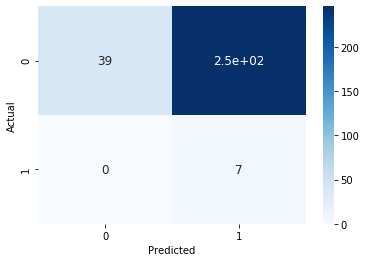

TP: 7, FP: 246, TN: 39, FN: 0
---------------------------------------------------------------
              precision    recall  f1-score   support

           0      1.000     0.137     0.241       285
           1      0.028     1.000     0.054         7

    accuracy                          0.158       292
   macro avg      0.514     0.568     0.147       292
weighted avg      0.977     0.158     0.236       292

---------------------------------------------------------------
Recall Score: 1.0
Macro Average of Recall Score: 0.5684210526315789
Weighted Average of Recall Score: 0.15753424657534246
---------------------------------------------------------------


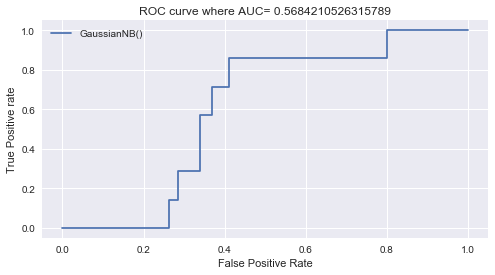

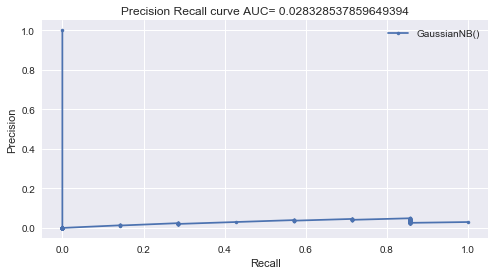

---------------------------------------------------------------


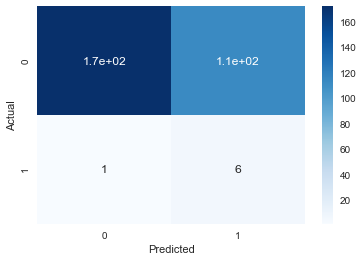

TP: 6, FP: 113, TN: 172, FN: 1
---------------------------------------------------------------
              precision    recall  f1-score   support

           0      0.994     0.604     0.751       285
           1      0.050     0.857     0.095         7

    accuracy                          0.610       292
   macro avg      0.522     0.730     0.423       292
weighted avg      0.972     0.610     0.735       292

---------------------------------------------------------------
Recall Score: 0.8571428571428571
Macro Average of Recall Score: 0.7303258145363408
Weighted Average of Recall Score: 0.6095890410958904
---------------------------------------------------------------


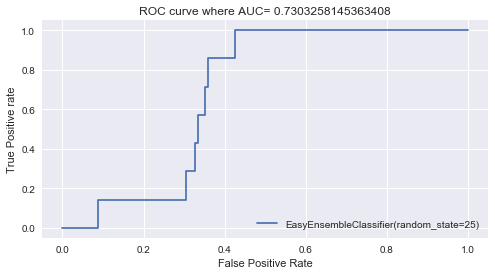

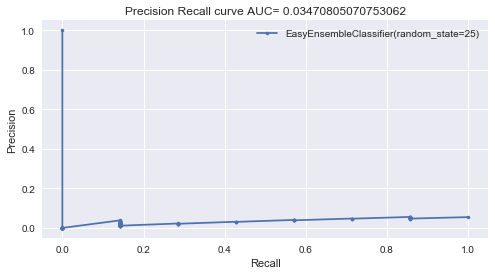

---------------------------------------------------------------


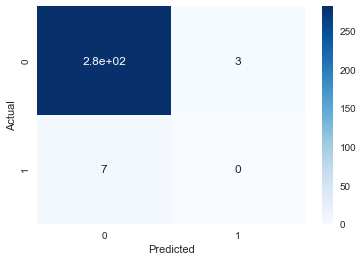

TP: 0, FP: 3, TN: 282, FN: 7
---------------------------------------------------------------
              precision    recall  f1-score   support

           0      0.976     0.989     0.983       285
           1      0.000     0.000     0.000         7

    accuracy                          0.966       292
   macro avg      0.488     0.495     0.491       292
weighted avg      0.952     0.966     0.959       292

---------------------------------------------------------------
Recall Score: 0.0
Macro Average of Recall Score: 0.49473684210526314
Weighted Average of Recall Score: 0.9657534246575342
---------------------------------------------------------------


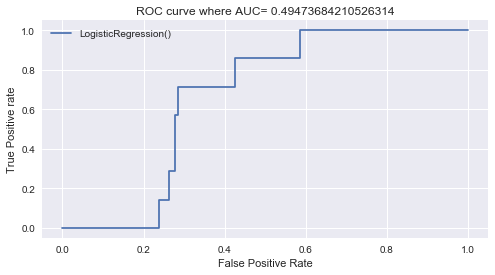

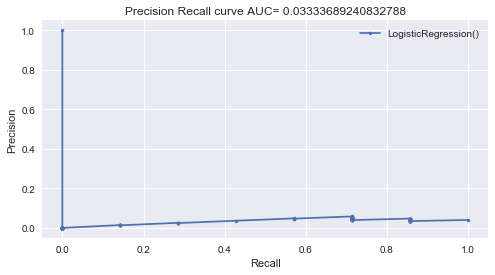

---------------------------------------------------------------


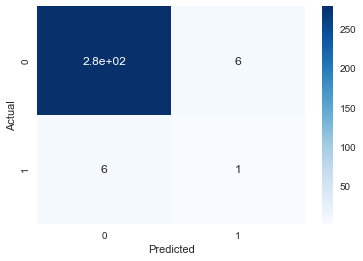

TP: 1, FP: 6, TN: 279, FN: 6
---------------------------------------------------------------
              precision    recall  f1-score   support

           0      0.979     0.979     0.979       285
           1      0.143     0.143     0.143         7

    accuracy                          0.959       292
   macro avg      0.561     0.561     0.561       292
weighted avg      0.959     0.959     0.959       292

---------------------------------------------------------------
Recall Score: 0.14285714285714285
Macro Average of Recall Score: 0.5609022556390978
Weighted Average of Recall Score: 0.958904109589041
---------------------------------------------------------------


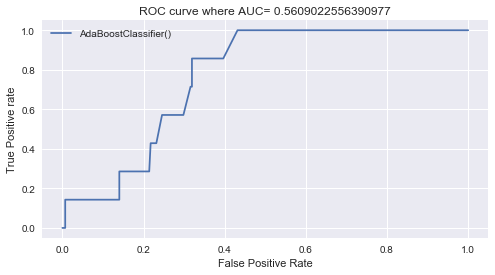

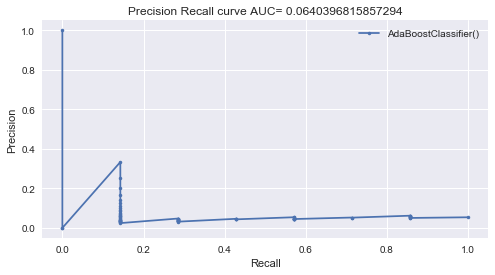

In [16]:
models = [GaussianNB(), EasyEnsembleClassifier(random_state = 25), LogisticRegression(), AdaBoostClassifier()]
roc_pr_cm(models)

### EasyEnsemble OR GaussianNB Classifier??

Recall Score: 0.8571428571428571
Macro Average of Recall Score: 0.7268170426065163
Weighted Average of Recall Score: 0.6027397260273972
.
Macro Average of Precision Score: 0.5218694118215649
Weighted Average of Precision Score: 0.9715083588059925
Macro Average of F1 Score: 0.41968201754385964
Weighted Average of F1 Score: 0.7299871575342466
.
Accuracy: 0.6027397260273972


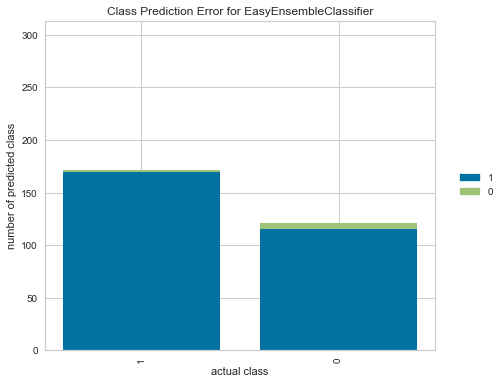

Recall Score: 1.0
Macro Average of Recall Score: 0.5684210526315789
Weighted Average of Recall Score: 0.15753424657534246
.
Macro Average of Precision Score: 0.5138339920948617
Weighted Average of Precision Score: 0.9766906708538632
Macro Average of F1 Score: 0.1472934472934473
Weighted Average of F1 Score: 0.23626039105491162
.
Accuracy: 0.15753424657534246


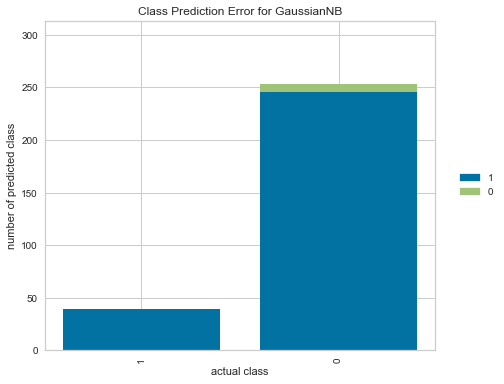

In [17]:
from sklearn import model_selection
from pprint import pprint

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.34, random_state =0)

model = [EasyEnsembleClassifier(random_state = 25), GaussianNB()]

for m in model:

    m.fit(X_train, y_train)
    y_hat = m.predict(X_test)
    y_hat_train = m.predict(X_train)

    macro_weighted_prec_rec(y_test, y_hat)

    classes = [1, 0]

    from yellowbrick.classifier import ClassPredictionError
    visualizer = ClassPredictionError(m, classes=classes)

    # Fit the training data to the visualizer
    visualizer.fit(X_train, y_train)

    # Evaluate the model on the test data
    visualizer.score(X_test, y_test)

    # Draw visualization
    visualizer.show()

### Chosen model: EasyEnsembleClassifier

Parameters currently in use:

{'base_estimator': None,
 'n_estimators': 10,
 'n_jobs': None,
 'random_state': 25,
 'replacement': False,
 'sampling_strategy': 'auto',
 'verbose': 0,
 'warm_start': False}
 
Accuracy Score of Train Set: 0.6466431095406361
Accuracy Score of Test Set: 0.6027397260273972
.
F1 Score of Train Set: 0.4952197488584475
F1 Score of Test Set: 0.41968201754385964


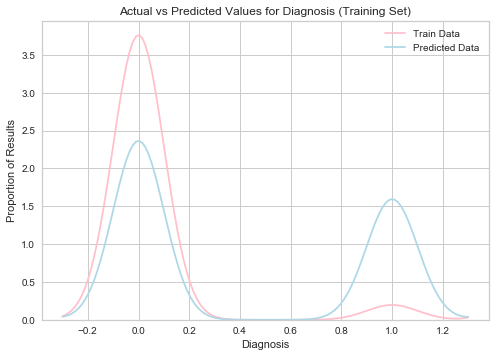

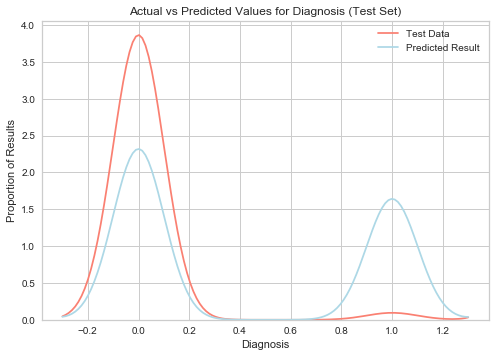

In [18]:
easy = EasyEnsembleClassifier(random_state = 25)

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(easy.get_params())

print (' ')

easy.fit(X_train, y_train)
y_hat = easy.predict(X_test)
y_hat_train = easy.predict(X_train)

f1_acc(y_test, y_hat, y_train, y_hat_train)